# Notebook to create visualizations to see winner/scores for each sentence

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
csv = pd.read_csv("inter-rater_reliability_elo_rankings.csv")
csv.index = range(1, len(csv) + 1)
csv.index.name = 'sentence ID'
csv

,sentence_start,llama2,llama3,mistral,winner
sentence ID,,,,,
1,It is expected that both ecological and social...,847.005759,1136.727072,1016.267169,llama3
2,The prompt acceleration of food aid pledges an...,1057.621378,874.115747,1068.262875,mistral
3,Some men were hesitant to assist with househol...,1135.337324,978.800973,885.861704,llama2
4,Pastoralists in the arid and semi-arid regions...,1074.649797,847.930456,1077.419747,mistral
5,The recent investment in improving existing ro...,847.180520,1054.258560,1098.560919,mistral
6,Wind turbine foundations may act as artificial...,993.412173,977.986432,1028.601394,mistral
7,"However, wars have been waged to reduce demogr...",983.510389,957.814727,1058.674885,mistral
8,The direct and indirect effects from offshore ...,1091.961463,999.485521,908.553016,llama2
9,"The study shows that the cultivation of crops,...",1052.263826,897.463453,1050.272721,llama2


### Graph of who won each sentence

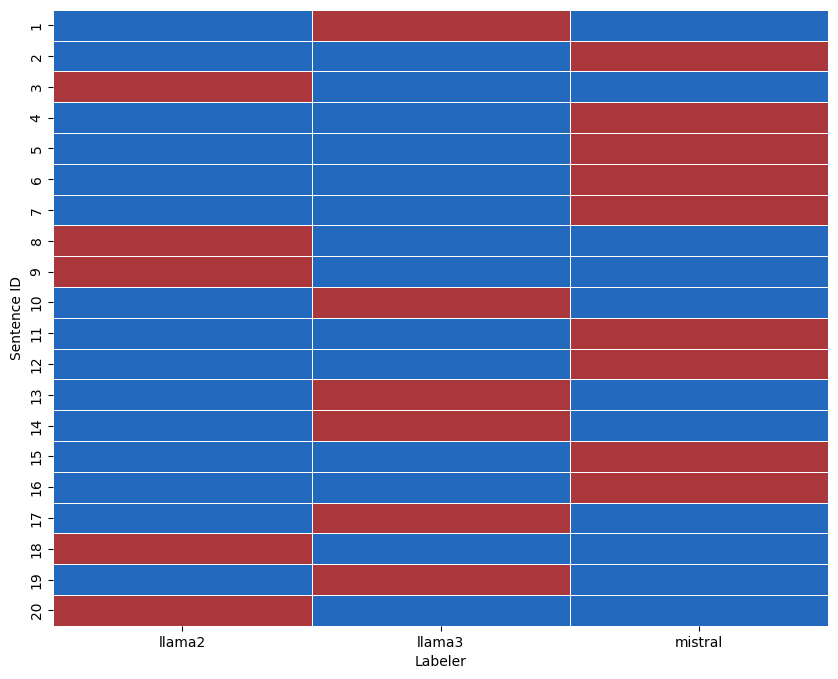

In [3]:
# List of all labelers
labelers = ['llama2', 'llama3', 'mistral']#, 'Aadarsh', 'Ashlin', 'Kuldeep', 'Maryam', 'Nate', 'Riley', 'Spencer']

# extract the 'winner' column and create a pivot table for the heatmap
winner_pivot = csv.pivot_table(index='sentence ID', columns='winner', aggfunc='size', fill_value=0)

# add even labelers not in "winner" to the plot
for labeler in labelers:
    if labeler not in winner_pivot.columns:
        winner_pivot[labeler] = 0

# reorder the columns to match the labelers list
winner_pivot = winner_pivot[labelers]

# create the heatmap
plt.figure(figsize=(10, 8))
cmap = sns.color_palette("vlag", as_cmap=True)
sns.heatmap(winner_pivot, annot=False, cmap = cmap, cbar = False, linewidths=.5)
#plt.title('Winners for Each Sentence')
plt.ylabel('Sentence ID')
plt.xlabel('Labeler')
plt.show()

### Average ELO by labeler

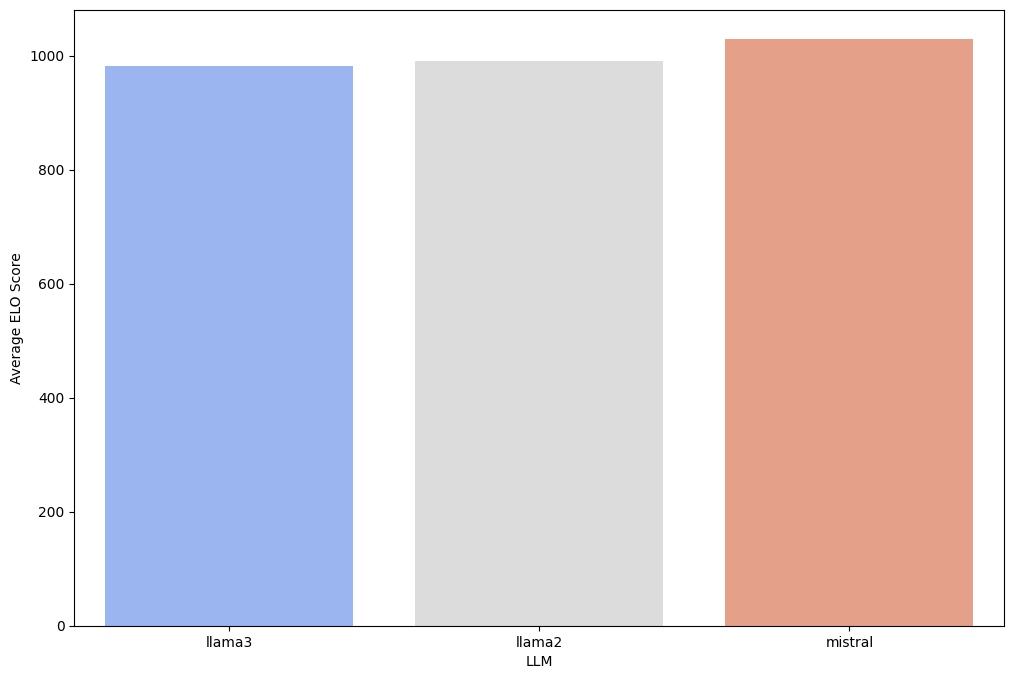

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

avg_elo_scores = csv[labelers].mean().sort_values()
plt.figure(figsize=(12, 8))
sns.barplot(y=avg_elo_scores.values, x=avg_elo_scores.index, palette='coolwarm')
#plt.title('Average ELO Scores by LLM')
plt.xlabel('LLM')
plt.ylabel('Average ELO Score')
plt.show()

### ELO Score by Labeler Heatmap

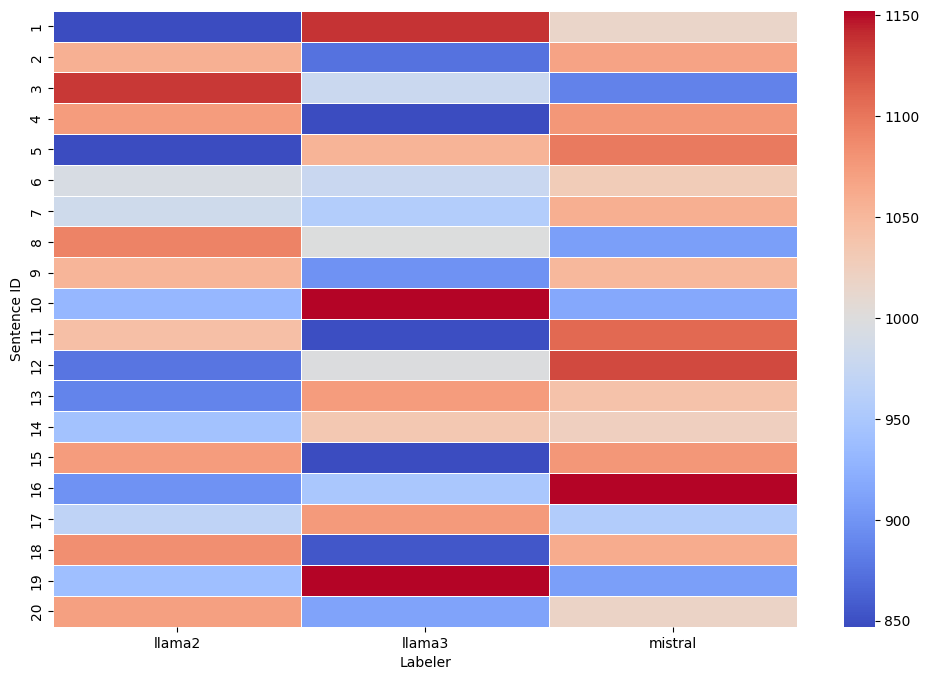

In [5]:
plt.figure(figsize=(12, 8))
sns.heatmap(csv[labelers], annot=False, cmap='coolwarm', linewidths=.5)
#plt.title('Heatmap of ELO Scores')
plt.xlabel('Labeler')
plt.ylabel('Sentence ID')
plt.show()